In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/neurips-open-polymer-prediction-2025/sample_submission.csv
/kaggle/input/neurips-open-polymer-prediction-2025/train.csv
/kaggle/input/neurips-open-polymer-prediction-2025/test.csv


In [24]:
df_train = pd.read_csv("/kaggle/input/neurips-open-polymer-prediction-2025/train.csv")

In [25]:
df_train.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,SMILES,Tg,FFV,Tc,Density,Rg
0,87817,*CC(*)c1ccccc1C(=O)OCCCCCC,NaN,0.374645,0.205667,NaN,NaN
1,106919,*Nc1ccc([C@H](CCC)c2ccc(C3(c4ccc([C@@H](CCC)c5...,NaN,0.370410,NaN,NaN,NaN
2,388772,*Oc1ccc(S(=O)(=O)c2ccc(Oc3ccc(C4(c5ccc(Oc6ccc(...,NaN,0.378860,NaN,NaN,NaN
3,519416,*Nc1ccc(-c2c(-c3ccc(C)cc3)c(-c3ccc(C)cc3)c(N*)...,NaN,0.387324,NaN,NaN,NaN
4,539187,*Oc1ccc(OC(=O)c2cc(OCCCCCCCCCOCC3CCCN3c3ccc([N...,NaN,0.355470,NaN,NaN,NaN


In [26]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       7973 non-null   int64  
 1   SMILES   7973 non-null   object 
 2   Tg       511 non-null    float64
 3   FFV      7030 non-null   float64
 4   Tc       737 non-null    float64
 5   Density  613 non-null    float64
 6   Rg       614 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 436.2+ KB


In [27]:
np.sum(df_train.isna(), axis=0 )

id            0
SMILES        0
Tg         7462
FFV         943
Tc         7236
Density    7360
Rg         7359
dtype: int64

In [28]:
df_train.isna().sum()

id            0
SMILES        0
Tg         7462
FFV         943
Tc         7236
Density    7360
Rg         7359
dtype: int64

In [29]:
df_train[df_train['Density'].isna() == False]  ## isnan only for numbers missing lol

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,SMILES,Tg,FFV,Tc,Density,Rg
10,2986007,*c1ccc(-c2ccc3c(c2)C(CCCCCCC#N)(CCCCCCC#N)c2cc...,NaN,0.402397,0.48700,0.901123,28.682441
11,3013292,*CC(*)c1ccc(C(=O)O)c(C(=O)O)c1,NaN,NaN,0.17100,1.184354,13.534248
46,11894206,*CC(*)C(=O)Oc1ccccc1C,NaN,0.357831,0.17350,1.061864,12.737463
64,16855553,*CC(*)C(=O)Oc1ccccc1,NaN,0.353941,0.19600,1.109389,13.435339
88,23192453,*CC(C)S(*)(=O)=O,NaN,NaN,NaN,1.293315,20.991323
...,...,...,...,...,...,...,...
7943,2141222333,*CC(*)C1CC=CCC1,NaN,NaN,0.18075,0.842083,12.703534
7944,2141227349,*CC(*)Cl,NaN,NaN,0.13900,1.263489,21.121972
7945,2141673799,*CCCCCC(=O)O*,NaN,0.348980,NaN,1.002696,18.833676
7952,2142796643,*CCCC(=O)NCc1ccc(CNC(=O)CCCO*)cc1,NaN,NaN,0.25900,1.107946,20.187782


In [30]:
X = df_train['SMILES']

In [31]:
np.average([len(i) for i in X])

58.35331744638154

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

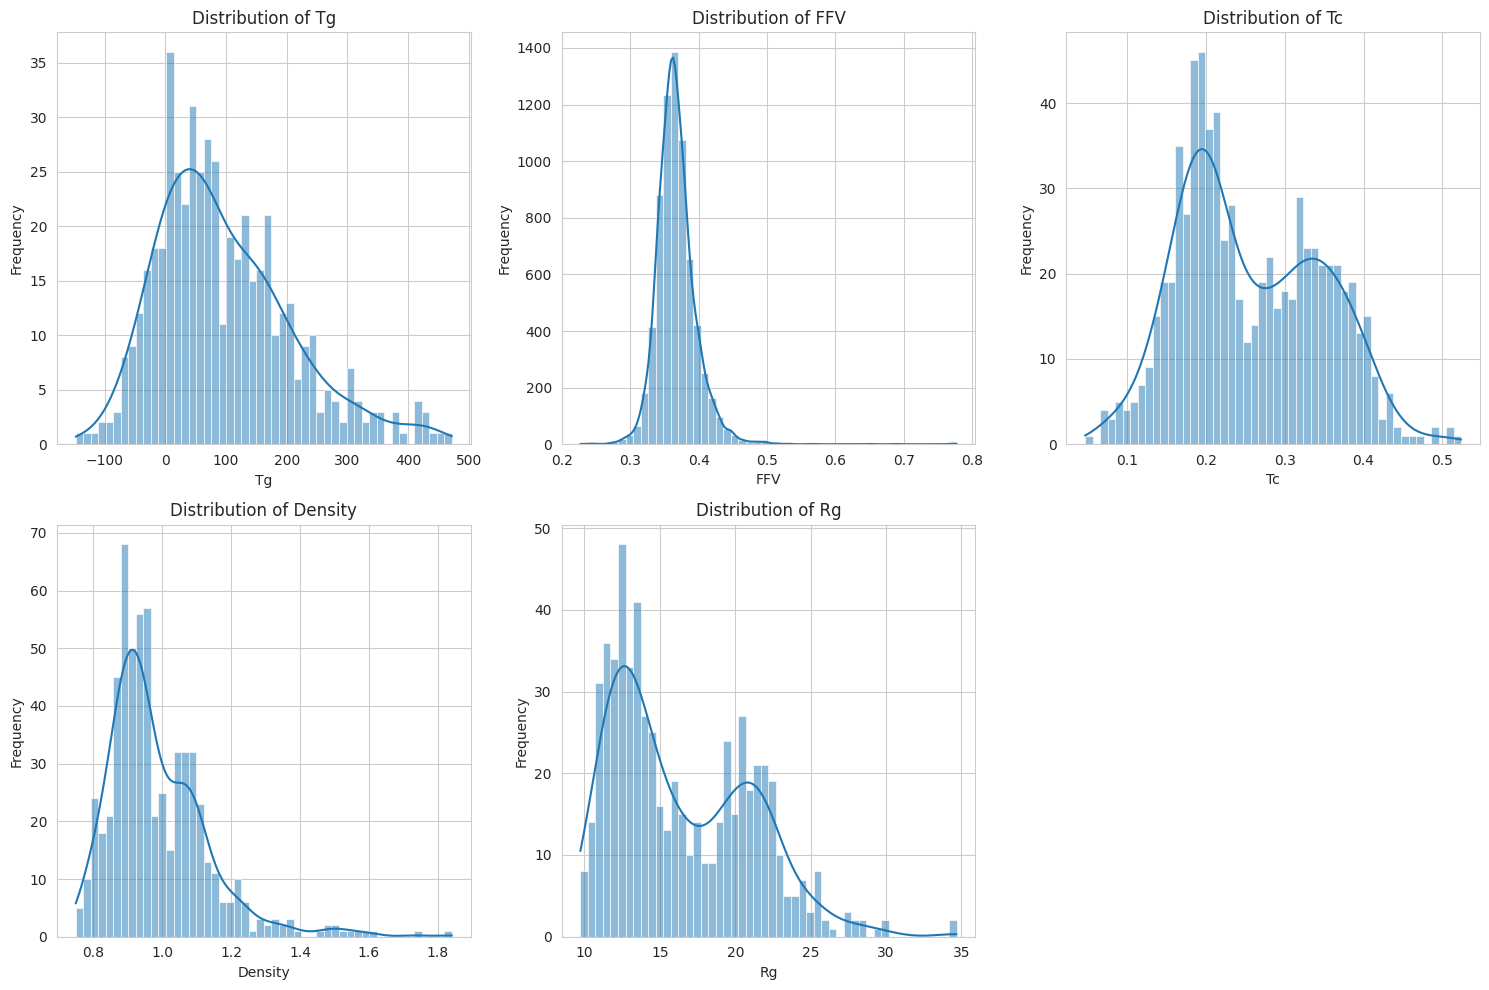

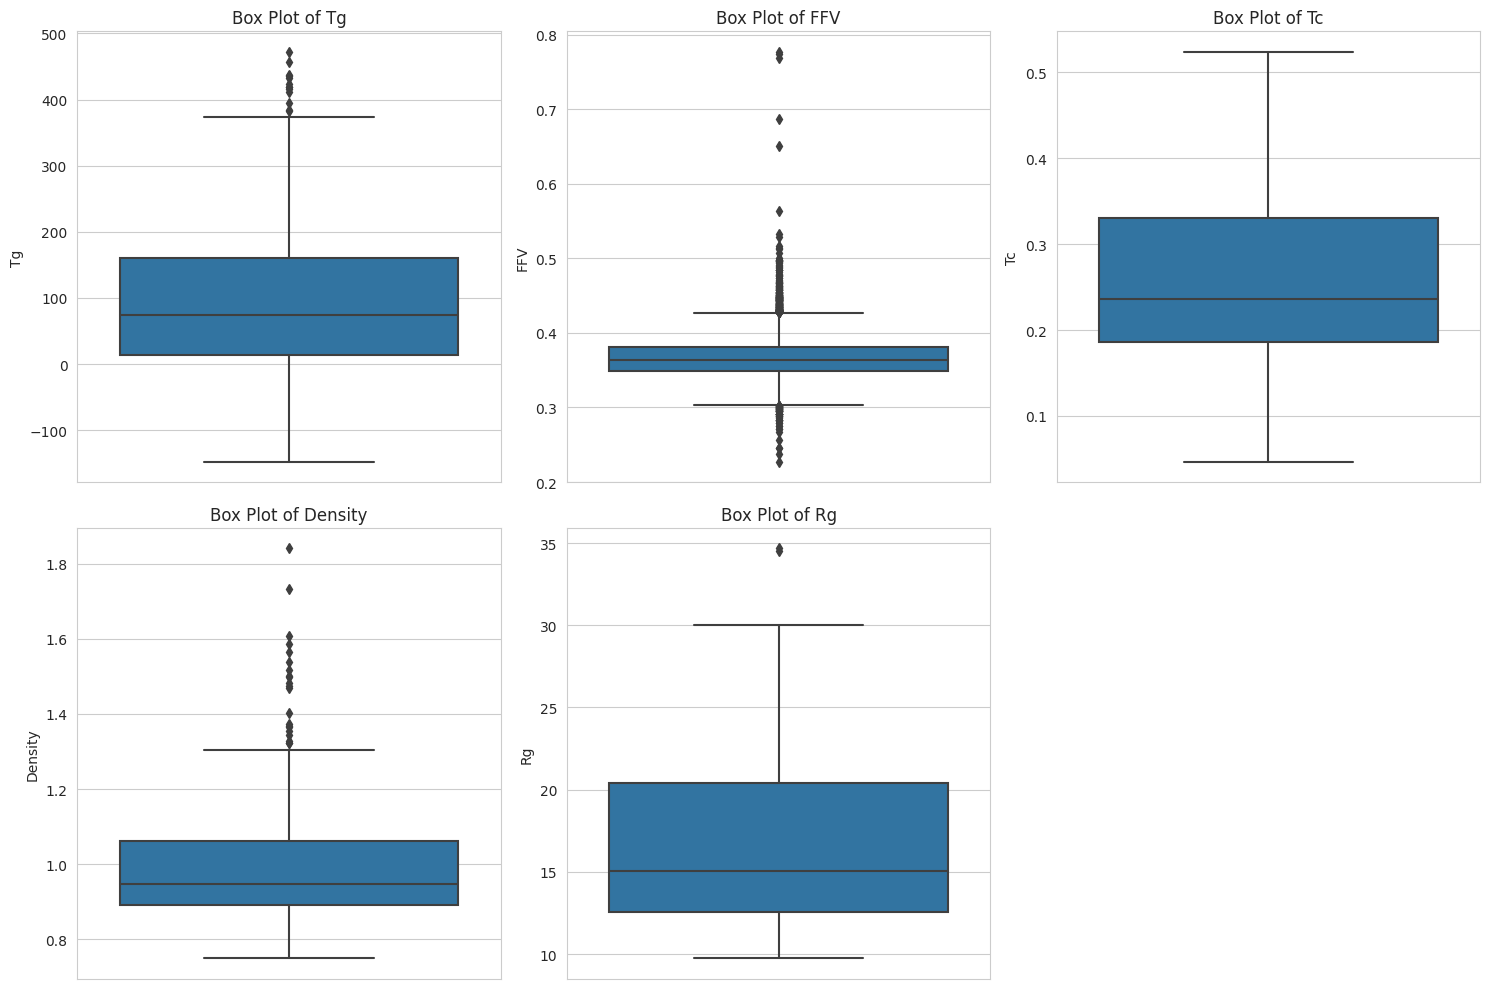

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


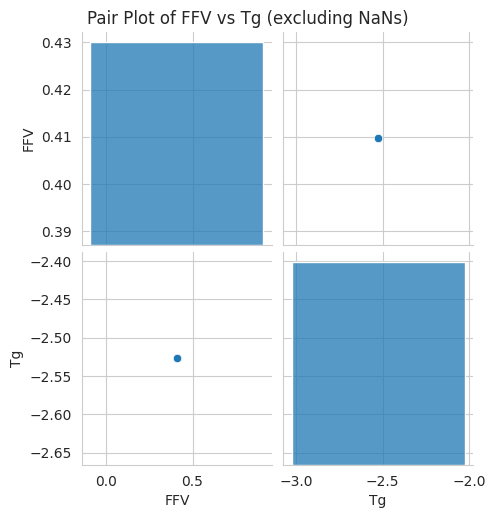

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


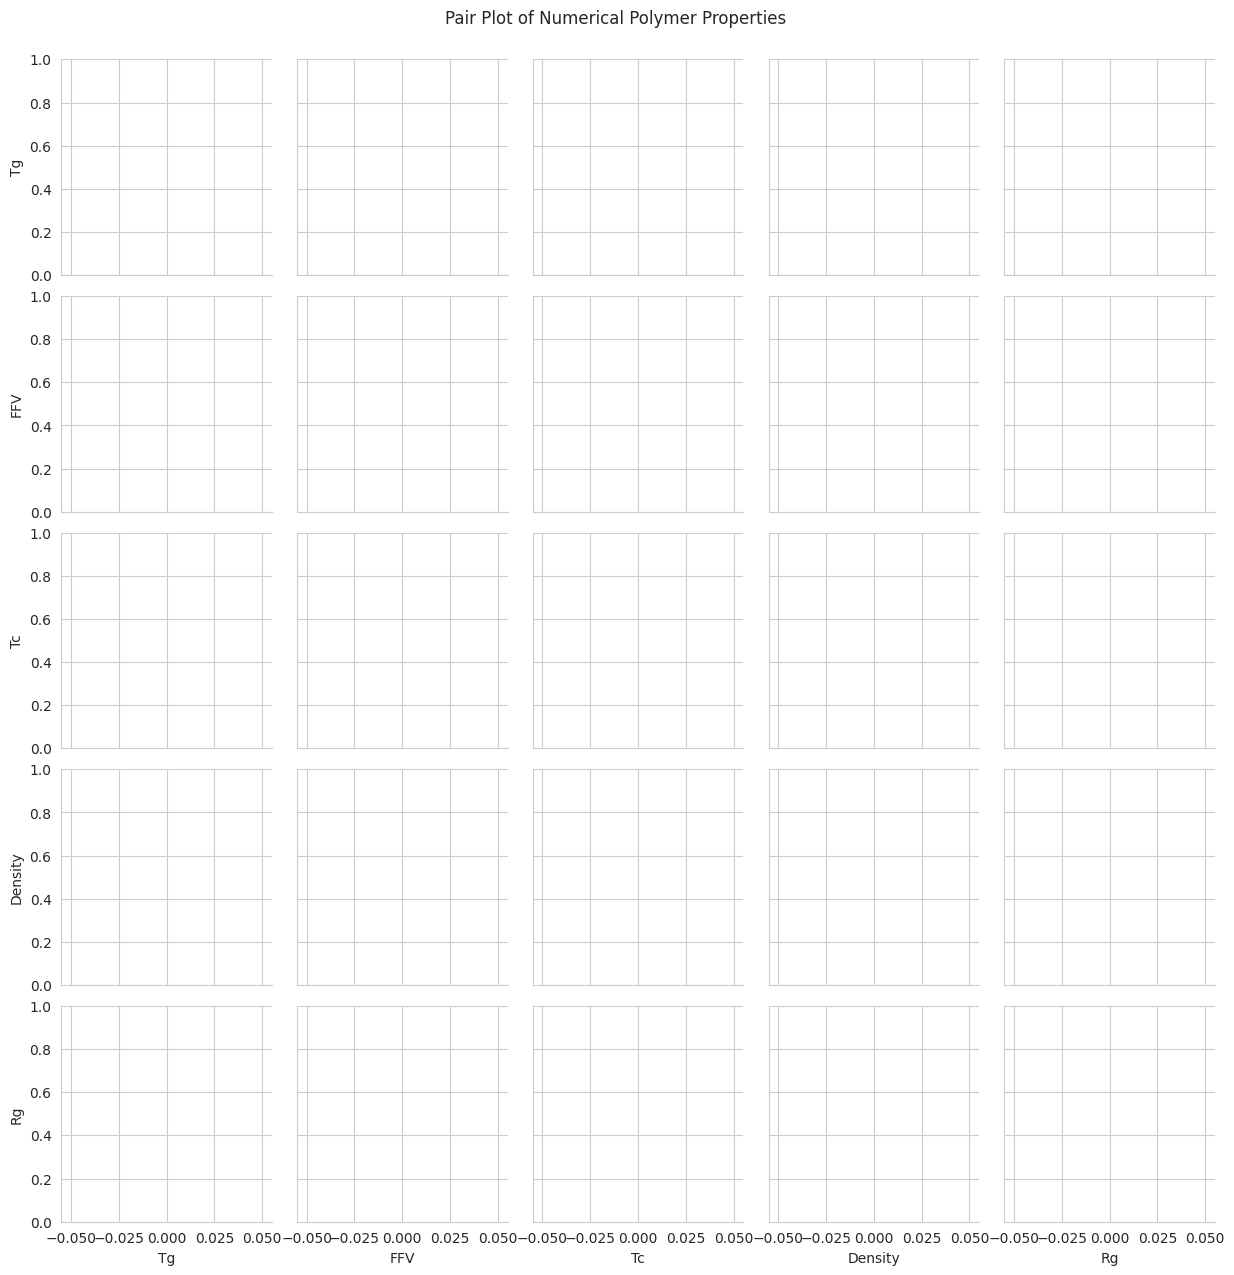

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


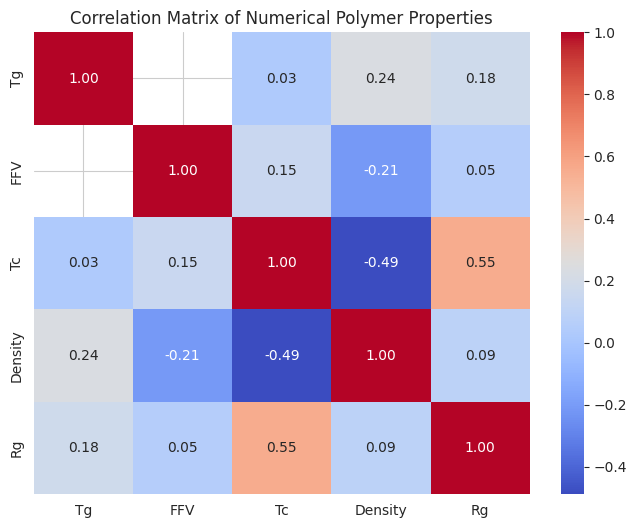

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


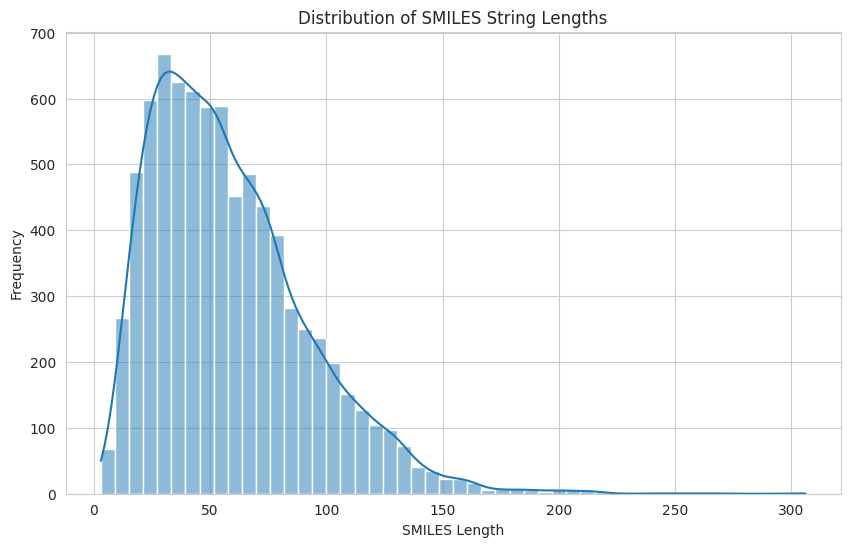


Finished generating initial visualizations. Review the plots to gain insights into your data's distributions, relationships, and potential outliers.
Especially pay attention to the NaNs in Tg, Tc, Density, and Rg in the histograms and box plots, as they indicate missing target values.


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for better aesthetics
sns.set_style("whitegrid")

# --- 1. Histograms for Numerical Features ---
# Shows the distribution of each numerical property.
# Useful for identifying skewness, outliers, and the range of values.

numerical_cols = ['Tg', 'FFV', 'Tc', 'Density', 'Rg']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid as needed
    sns.histplot(df_train[col].dropna(), kde=True, bins=50) # dropna() to handle NaNs
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# --- 2. Box Plots for Numerical Features ---
# Shows the median, quartiles, and potential outliers for each numerical property.
# Good for comparing distributions and spotting outliers.

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df_train[col].dropna()) # dropna() to handle NaNs
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# --- 3. Pair Plot (Scatter plots between numerical features) ---
# Shows relationships (correlations) between all pairs of numerical features.
# The diagonal typically shows the distribution (KDE or histogram).
# Note: This can be computationally intensive for many columns or very large datasets.

# For a clearer view, let's include only the target properties that have more non-null values initially
# Based on your head(), FFV seems to have fewer NaNs than the others.
# If you run df_train.info() you'll know exactly which ones have data.
# For now, let's try with FFV and any other columns that have some data.
# You might want to select columns with fewer NaNs after running df_train.info()

# Let's assume after info() you see FFV and maybe one or two others have enough data.
# For demonstration, let's pick FFV and Tg (even if Tg has NaNs, a pairplot will show the available data)
# We will drop NaNs for the pair plot to avoid issues.
# It's usually best to pick columns with a good amount of data for pair plots.
# Let's consider a subset that might have some overlapping data points.

# Before running pairplot, it's good to check the non-null counts again for relevant columns
# For instance, if 'FFV' has many values and 'Tg' only a few, the scatter plot for 'FFV' vs 'Tg' will be sparse.

# Assuming FFV, Tg, Tc, Density, Rg are the main targets, let's plot the ones with data.
# Let's create a DataFrame with just these columns and drop rows where all of them are NaN
# or just drop NaNs for the specific pairs we are plotting.

# For a general pair plot, we often select a few key numerical features.
# Let's use the ones that potentially have more data.
# From the df_train.head(), FFV seems to have data for all rows.
# Tg, Tc, Density, Rg have NaNs.
# A pairplot will only plot the non-NaN pairs.

# Let's try plotting all numerical columns, dropping rows where *any* of them are NaN for the pairplot.
# Be aware that if many columns have NaNs, this could result in an empty plot if there are no rows
# where all selected columns are non-null.
# A safer approach for initial pairplot might be to just take a few columns.

# Let's try with a subset of columns that *might* have some overlap in non-null values.
# If you run `df_train.info()` first, you can pick the columns that have a reasonable number of non-null entries.
# For example, if FFV and Tg are your main focus:
sns.pairplot(df_train[['FFV', 'Tg']].dropna())
plt.suptitle('Pair Plot of FFV vs Tg (excluding NaNs)', y=1.02) # y adjusts title position
plt.show()


# Let's attempt a pair plot with all the numerical columns, being mindful of NaNs.
# Seaborn's pairplot handles NaNs by not plotting them.
# So, we can just pass the original df_train.
sns.pairplot(df_train[numerical_cols].dropna()) # Drop rows with ANY NaN in these columns for the pairplot
plt.suptitle('Pair Plot of Numerical Polymer Properties', y=1.02) # Adjust title position
plt.show()

# --- 4. Correlation Heatmap ---
# Shows the correlation coefficients between numerical features.
# Helps identify highly correlated features (positive or negative).

plt.figure(figsize=(8, 6))
# Calculate the correlation matrix, dropping rows with NaNs for accurate correlation calculation
correlation_matrix = df_train[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Polymer Properties')
plt.show()

# --- Visualizing the SMILES string (more advanced, often requires libraries like RDKit) ---
# Direct visualization of SMILES as a standard plot is not straightforward.
# However, we can look at characteristics of the SMILES strings.

# --- 5. Length of SMILES strings distribution ---
# Can sometimes reveal patterns or outliers in the complexity of molecules.

df_train['SMILES_length'] = df_train['SMILES'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df_train['SMILES_length'], kde=True, bins=50)
plt.title('Distribution of SMILES String Lengths')
plt.xlabel('SMILES Length')
plt.ylabel('Frequency')
plt.show()

# You can also look at the most common SMILES, but for polymers, they are likely unique.
df_train['SMILES'].value_counts().head(10) # Uncomment to see top 10 most frequent SMILES (likely all 1 if unique)

# --- Future ideas (after initial understanding): ---
# - If you extract molecular features (e.g., molecular weight, number of rings from SMILES),
#   you can then plot those against the target properties.
# - Plotting specific polymer types (if you can categorize them from SMILES or other info)
#   against their properties.

print("\nFinished generating initial visualizations. Review the plots to gain insights into your data's distributions, relationships, and potential outliers.")
print("Especially pay attention to the NaNs in Tg, Tc, Density, and Rg in the histograms and box plots, as they indicate missing target values.")